# TP : Suivi cinétique d'une réaction de saponification par conductimétrie

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## Réaction de saponification

La réaction chimique de saponification est la suivante :
$$\text{EtCOOEt}_\text{(aq)} + \text{HO}^-_\text{(aq)} = \text{EtCOO}^-_\text{(aq)} + \text{EtOH}_\text{(aq)}$$

Cette réaction est quantitative mais lente, et, compte-tenu de la différence de conductivité molaire des ions $\text{HO}^-$ et $\text{EtCOO}^-$ a une conductivité $\sigma(t)$ qui décroît au cours du temps.</br>

## Cinétique chimique

En admettant que cette réaction admette un ordre, on peut écrire : 
$$-\dfrac{\text{d} [\text{EtCOOEt}_\text{(aq)}] }{\text{d}t}=k[\text{EtCOOEt}_\text{(aq)}]^\alpha[\text{HO}^-_\text{(aq)}]^\beta$$
&nbsp;</br>
La méthode des conditions initiales en proportions stœchiométriques permet alors de simplifier cette expression et d'obtenir : 
$$-\dfrac{\text{d} [\text{EtCOOEt}_\text{(aq)}] }{\text{d}t}=k[\text{EtCOOEt}_\text{(aq)}]^{\alpha+\beta}$$
&nbsp;</br>
On peut alors déterminer l'ordre global $\alpha+\beta$ de la réaction si on dispose d'une moyen de mesurer $C(t)=[\text{EtCOOEt}_\text{(aq)}]$.

## Expression de la conductivité

La loi de Kolraush permet de relier la conductivité d'une solution à sa concentration en espèces ioniques, et ici : 
$$\sigma(t) = \Lambda^\circ_{\text{HO}^-}[\text{HO}^-] + \Lambda^\circ_{\text{Na}^+}[\text{Na}^+]+ \Lambda^\circ_{\text{EtCOO}^-}[\text{EtCOO}^-]$$
&nbsp;</br>
En utilisant un tableau d'avancement, et en notant $C(t)=[\text{EtCOOEt}_\text{(aq)}](t)$,  on montre que :
$$C(t)=C_0\dfrac{\sigma(t)-\sigma_\infty}{\sigma_0-\sigma_\infty}$$

où $\sigma_\infty$ est la valeur de la conductivité en fin de réaction et $\sigma_0$ est la valeur de la conductivité en début de réaction.</br>

En mesurant la valeur initiale de la conductivité à l'instant initial (c'est-à-dire celle de la soude diluée par $\text{EtCOOEt}_\text{(aq)}$, ainsi que la conductivité en fin de réaction, on peut en déduire la valeur de $C(t)$ et tracer les courbes appropriées permettant de déterminer l'ordre global de la réaction.

## Ordre de réaction
* Ordre 0 : La loi cinétique s'écrit $-\dfrac{\text{d}C}{\text{d}t}=kC^0$, dont on déduit : $C(t)=C_0-kt$ ;
* Ordre 1 : La loi cinétique s'écrit $-\dfrac{\text{d}C}{\text{d}t}=kC^1$, dont on déduit : $C(t)=C_0\text{e}^{-kt}$ ;
* Ordre 2 : La loi cinétique s'écrit $-\dfrac{\text{d}C}{\text{d}t}=kC^2$, dont on déduit : $\frac{1}{C(t)}=\frac{1}{C_0}+kt$.</br>

Pour identifier l'ordre recherché, on tracera les fonctions suivantes, et on les comparera à des droites :
* Ordre 0 : On tracera $\frac{C(t)}{C_0}=\frac{\sigma(t)-\sigma_\infty}{\sigma_0-\sigma_\infty}=1-\frac{k}{C_0}t$ ;
* Ordre 1 : On tracera $\ln\left(\frac{C(t)}{C_0}\right)=-kt$ ;
* Ordre 2 : On tracera $\frac{C_0}{C(t)}=1+C_0kt$.</br>

La recherche du meilleur accord permettra d'identifier l'ordre ainsi que la valeur de $k$ associée.

## Résultat des mesures conductimétriques

In [2]:
C0 = 0.5e-2 # concentration initiale en EtCOOEt, une fois diluée dans la soude
u_C0 = .5e-4 # estimation de l'incertitude-type sur la concentration initiale

N = 100000 # paramètre des simulations de MonteCarlo

temps = np.linspace(0,25, 25)
sigma = np.array([2.387/2, 1.1065, 1.0185, .9555, .9085, .8745, .8475, .8255, .8065, .7925, .7805, .7695,
                 .7605, .7535, .7465, .7415, .7355, .7315, .7275, .7235, .7205, .7175, .7145, .7125, 
                  .7105])

u_sigma = np.array(len(sigma)*[.001])

# On en déduit la valeur mesurée de $\sigma_0$ et une première version de $\sigma_\infty$
sigma_0 = 2.387/2
u_sigma_0 = .001
sigma_infty = 6.35e-1 # l'évaluation de cette limite est très subjective et a été faite a posteriori (cf. analyse des résultats)
u_sigma_infty = 2e-3

print(sigma_0)

1.1935


## Ordre 0
### Création de $C(t)$

In [3]:
C = []
u_C = []
for i in range(len(sigma)):
    C_store=[]
    for j in range(N):
        C_store.append((sigma[i] + np.random.uniform(-1,1)*u_sigma[i] - (sigma_infty + np.random.uniform(-1,1)*u_sigma_infty))/((sigma_0 + np.random.uniform(-1,1)*u_sigma_0 - (sigma_infty + np.random.uniform(-1,1)*u_sigma_infty))))
    C.append(np.mean(C_store))
    u_C.append(np.std(C_store, ddof=1))

### Tracé de $C(t)$

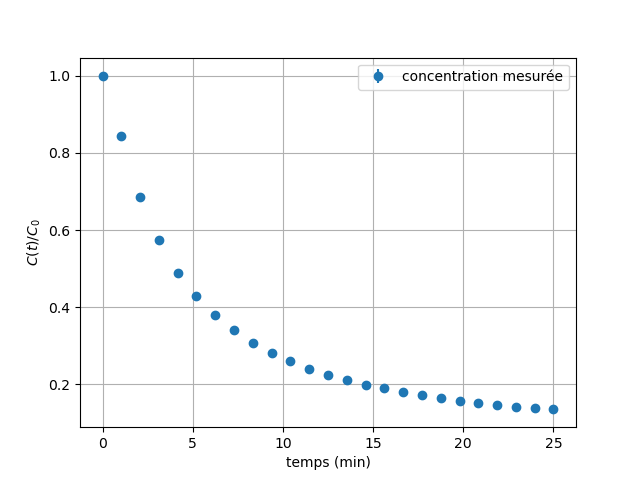

In [4]:
plt.figure()
plt.errorbar(temps, C, yerr = u_C, fmt='o' ,label="concentration mesurée")
plt.xlabel("temps (min)")
plt.ylabel(r"$C(t)/C_0$")
plt.grid(True)
plt.legend()
plt.show()

La courbe obtenue n'est visiblement pas une droite, ce qui élimine l'hypothèse cinétique d'ordre 0.

## Ordre 1
### Création de $\ln\left(\frac{C(t)}{C_0}\right)$

In [5]:
lnC = []
u_lnC = []
for i in range(len(sigma)):
    lnC_store=[]
    for j in range(N):
        lnC_store.append(np.log(sigma[i] + np.random.uniform(-1,1)*u_sigma[i] - (sigma_infty + np.random.uniform(-1,1)*u_sigma_infty))/((sigma_0 + np.random.uniform(-1,1)*u_sigma_0 - (sigma_infty + np.random.uniform(-1,1)*u_sigma_infty))))
    lnC.append(np.mean(lnC_store))
    u_lnC.append(np.std(lnC_store, ddof=1))

### Tracé de $\ln\left(\frac{C(t)}{C_0}\right)$

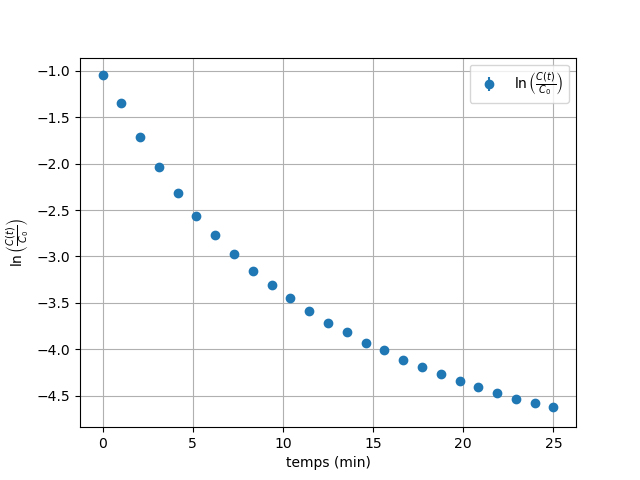

In [6]:
plt.figure()
plt.errorbar(temps, lnC, yerr = u_lnC, fmt='o' ,label=r"$\ln\left(\frac{C(t)}{C_0}\right)$")
plt.xlabel("temps (min)")
plt.ylabel(r"$\ln\left(\frac{C(t)}{C_0}\right)$")
plt.grid(True)
plt.legend()
plt.show()

Là non plus, la courbe obtenue n'est visiblement pas une droite, ce qui élimine l'hypothèse cinétique d'ordre 1.

## Ordre 2
### Création de $\frac{C_0}{C(t)}$

In [7]:
invC = []
u_invC = []
for i in range(len(sigma)):
    invC_store=[]
    for j in range(N):
        invC_store.append(((sigma_0 + np.random.uniform(-1,1)*u_sigma_0 - (sigma_infty + np.random.uniform(-1,1)*u_sigma_infty)))/(sigma[i] + np.random.uniform(-1,1)*u_sigma[i] - (sigma_infty + np.random.uniform(-1,1)*u_sigma_infty)))
    invC.append(np.mean(invC_store))
    u_invC.append(np.std(invC_store, ddof=1))

### Tracé de $\frac{C_0}{C(t)}$

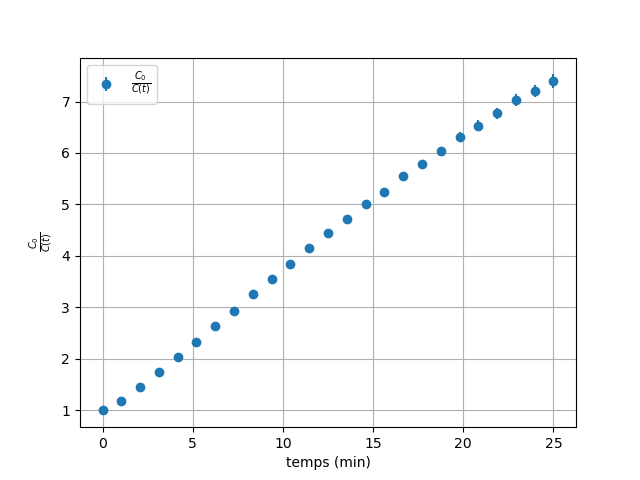

In [8]:
plt.figure()
plt.errorbar(temps, invC, yerr = u_invC, fmt='o' ,label=r"$\frac{C_0}{C(t)}$")
plt.xlabel("temps (min)")
plt.ylabel(r"$\frac{C_0}{C(t)}$")
plt.grid(True)
plt.legend()
plt.show()

La distribution de points semble ici proche d'une droite affine. On retient cet ordre comme le plus probable et on exploite cette courbe pour déterminer la constante de vitesse $k$.

## Détermination de la constante cinétique $k$

### Détermination de la pente et de l'ordonnée à l'origine

La valeur de l'ordonnée à l'origine est censée être égale à 1. On se servira de ce critère pour affiner la valeur de $\sigma_\infty$ choisie en début de ce `notebook`.

In [9]:
a_store = []
b_store = []

for i in range(N):
    z = np.polyfit(temps, np.array(invC) + np.random.uniform(-1,1,len(invC)), 1)
    a_store.append(z[0])
    b_store.append(z[1])
    
a = np.mean(a_store)
u_a = np.std(a_store,ddof=1)
b = np.mean(b_store)
u_b = np.std(b_store,ddof=1)

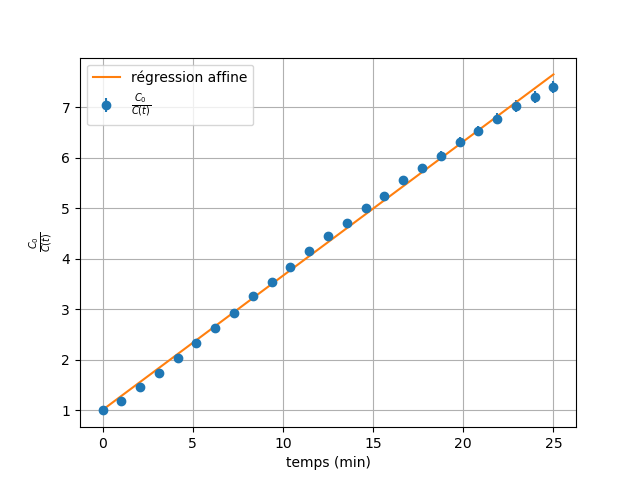

La valeur de la pente calculée est de  0.27 +/- 1.5e-02 min^{-1}
La valeur de l'ordonnée à l'origine calculée est de  1.01 +/- 2.24e-01 min^{-1}
**
L'écart relatif sur la valeur de l'ordonnée à l'origine est de  -0.6 %


In [10]:
plt.figure()
plt.errorbar(temps, invC, yerr = u_invC, fmt='o' ,label=r"$\frac{C_0}{C(t)}$")
plt.plot(temps, a*temps+b, label="régression affine")
plt.xlabel("temps (min)")
plt.ylabel(r"$\frac{C_0}{C(t)}$")
plt.grid(True)
plt.legend()
plt.show()

print("La valeur de la pente calculée est de ", format(a, "#.2f"), "+/-", format(u_a,"#.1e"), "min^{-1}")
print("La valeur de l'ordonnée à l'origine calculée est de ", format(b, "#.2f"), "+/-", format(u_b,"#.2e"), "min^{-1}")
print("**")
print("L'écart relatif sur la valeur de l'ordonnée à l'origine est de ", format(100*(1-b),"#.1f"), "%")

### Déduction de la constante cinétique $k$

On déduit de la forme choisie : 
$$k=\dfrac{a}{C_0}$$
où $a$ est la pente de la régression précédente

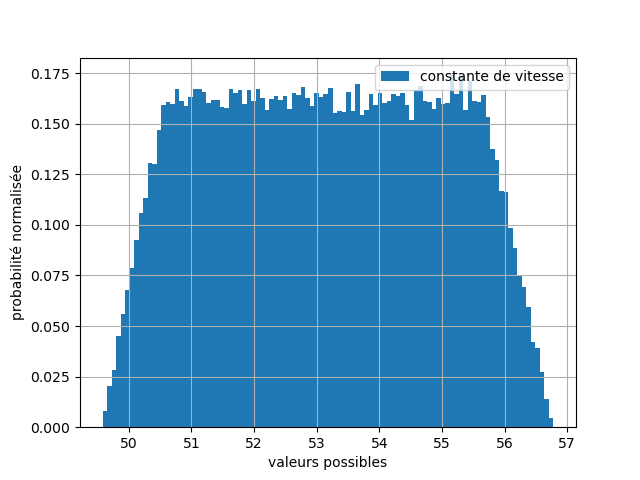

La valeur de la constante de vitesse réactionnelle est de  53. +/- 1.8e+00 L.mol^{-1}.min^{-1}


In [11]:
k_store = []
for i in range(N):
    k_store.append((a + np.random.uniform(-1,1)*u_a)/(C0+ np.random.uniform(-1,1)*u_C0))

k = np.mean(k_store)
u_k = np.std(k_store, ddof=1)

plt.figure()
plt.hist(k_store,bins=100, density=True, stacked=True, label="constante de vitesse")
plt.xlabel("valeurs possibles")
plt.ylabel("probabilité normalisée")
plt.grid(True)
plt.legend()
plt.show()

print("La valeur de la constante de vitesse réactionnelle est de ", format(k, "#.0f"), "+/-", format(u_k,"#.1e"), "L.mol^{-1}.min^{-1}")

## Retour sur la recherche de la limite $\sigma_\infty$

La constante cinétique trouvée on peut alors tracer une courbe théorique de $\sigma(t)$ : 
$$\sigma(t)=\dfrac{\sigma_0-\sigma_\infty}{1+C_0 k t}+\sigma_\infty$$
&nbsp;</br>
et vérifier que les points expérimentaux et ceux calculés à partir de la loi cinétique d'ordre deux sont conformes.

In [12]:
C0_s = C0
k_s = k

def sigma_fit(t,a,b):
    return a/(1+C0_s*k_s*t) + b

a_store = []
b_store = []
for i in range(N):
    C0_s = C0 + np.random.uniform(-1,1)*u_C0
    k_s = k+np.random.uniform(-1,1)*u_k
    z, cov_z = optimize.curve_fit(sigma_fit, temps, sigma)
    a_store.append(z[0])
    b_store.append(z[1])

a_moy = np.mean(a_store)
u_a = np.std(a_store, ddof=1)
b_moy = np.mean(b_store)
u_b = np.std(b_store, ddof=1)
c_moy = np.mean(np.array(a_store)+np.array(b_store))
u_c = np.std(np.array(a_store)+np.array(b_store), ddof=1)

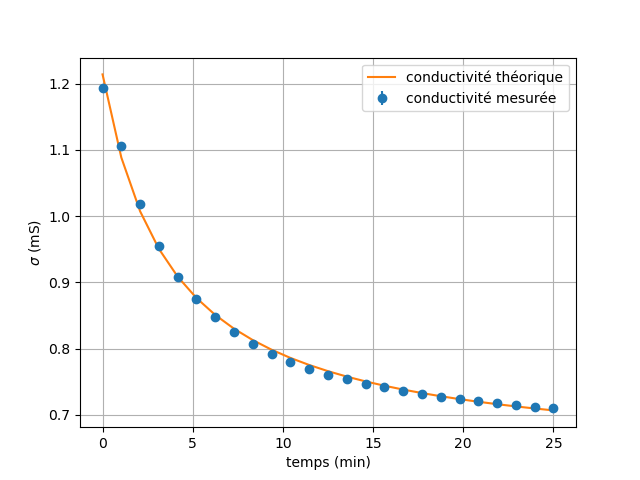

La valeur de sigma_infini calculé par python est :  6.29e-01 +/- 2.0e-03 mS
La valeur de sigma_0 calculé par python est :  1.214e+00 +/- 2.0e-03 mS


In [13]:
plt.figure()
plt.errorbar(temps, sigma, yerr = u_sigma, fmt='o' ,label="conductivité mesurée")
plt.plot(temps, sigma_fit(temps, a_moy, b_moy),label="conductivité théorique")
plt.xlabel("temps (min)")
plt.ylabel(r"$\sigma$ (mS)")
plt.grid(True)
plt.legend()
plt.show()

print("La valeur de sigma_infini calculé par python est : ", format(b_moy,"#.2e"),"+/-", format(u_b, "#.1e"), "mS")
print("La valeur de sigma_0 calculé par python est : ", format(c_moy,"#.3e"),"+/-", format(u_c, "#.1e"), "mS")

Les valeurs trouvées par régression sont quelque peu différentes de celles choisies en tout début de notebook.


In [14]:
print("L'écart relatif sur sigma_infty est ", format(100*np.abs(b_moy-sigma_infty)/sigma_infty, "#.0f"), "%")
print("L'écart relatif sur sigma_0 est ", format(100*np.abs(c_moy-sigma_0)/sigma_0, "#.0f"), "%")

L'écart relatif sur sigma_infty est  1. %
L'écart relatif sur sigma_0 est  2. %
